In [1]:
cd Q:\sachuriga\Sachuriga_Python\quattrocolo-nwb4fp\src

Q:\sachuriga\Sachuriga_Python\quattrocolo-nwb4fp\src


In [2]:
from neurochat.nc_data import NData
from neurochat.nc_spike import NSpike
from neurochat.nc_spatial import NSpatial
import neurochat.nc_plot as nc_plot
from neurochat.nc_lfp import NLfp
import matplotlib.pyplot as plt
import numpy as np
from pynwb import NWBHDF5IO
import matplotlib.pyplot as plt
import numpy as np
import math
import pynapple as nap
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import normalize

import sys
import nwb4fp.analyses.maps as mapp
from nwb4fp.analyses.examples.tracking_plot import plot_ratemap,plot_path
from nwb4fp.analyses.fields import separate_fields_by_laplace, separate_fields_by_dilation,find_peaks,separate_fields_by_laplace_of_gaussian,calculate_field_centers,distance_to_edge_function, remove_fields_by_area, map_pass_to_unit_circle,which_field,compute_crossings
from elephant.statistics import time_histogram, instantaneous_rate
from nwb4fp.analyses import maps
from nwb4fp.analyses.data import pos2speed,speed_filtered_spikes,load_speed_fromNWB,load_units_fromNWB,find_run_indices,unit_location_ch
from scipy.ndimage import gaussian_filter
import ast
import pandas as pd

Q:\sachuriga\Sachuriga_Python\quattrocolo-nwb4fp\src\nwb4fp\analyses\examples\tracking_plot.py:5: DeprecationWarning: Please import `center_of_mass` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.measurements import center_of_mass


here
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:145: UserWarning: Metadata name 'num_negative_peaks.1' contains a special character, and cannot be accessed as an attribute. Use 'get_info()' or key indexing to access metadata.
  warnings.warn(
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:145: UserWarning: Metadata name 'recovery_slope.1' contains a special character, and cannot be accessed as an attribute. Use 'get_info()' or key indexing to access metadata.
  warnings.warn(
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:145: UserWarning: Metadata name 'cluster_id.21' contains a special character, and cannot be accessed as an attribute. Use 'get_info()' or key indexing to access metadata.
  warnings.warn(
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:145: UserWarning: Meta

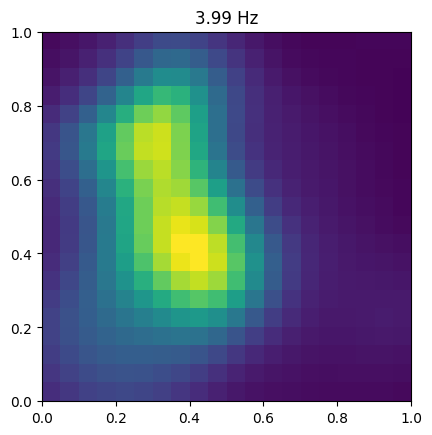

<Figure size 600x600 with 0 Axes>

In [17]:
import pandas as pd
pd.set_option('display.max_rows', None)
np.set_printoptions(threshold=np.inf)
## unit11: unit_num = 8, ch = 13
filepath = r"S:\Sachuriga/nwb/63383_2024-07-10_15-37-51_A_phy_k_manual.nwb"
npdata = nap.load_file(filepath)
npdata

## Load data
pos_cord = load_speed_fromNWB(npdata['XY_mid_brain'])

## filter speed
raw_pos,combined_array, mask,speeds,smoothed_speed,filtered_speed = pos2speed(pos_cord[:,0], # times
                            pos_cord[:,1], # x
                            pos_cord[:,2], # y
                            filter_speed=True, 
                            min_speed = 0.05)

## filter spikes with speed
unit_num=4
raw_pos=combined_array
# ## filter spikes with speed
# spk = speed_filtered_spikes(spikes_time,
#                             pos_cord[:,0], # times
#                             mask)
#for i in range(40):
spikes_time = load_units_fromNWB(npdata['units'], unit_num = unit_num)
spk = speed_filtered_spikes(spikes_time,
                            raw_pos[:,0])
time_stemp = pos_cord[:,0]
plot_ratemap(raw_pos[:,1], # x
            raw_pos[:,2], # y
            raw_pos[:,0], # times
            spikes_time ,
            box_size=[1.0, 1.0], 
            bin_size=0.05,
            smoothing=0.1)

x_input = npdata['units']['x'][unit_num]
y_input = npdata['units']['y'][unit_num]

In [4]:
#Exatract LFP
lfp_times = npdata['lfp_times']
lfp_all = npdata['lfp_raw']
ch_num = unit_location_ch(x_input=x_input,y_input=y_input)
lfp = lfp_all[:,ch_num[0]]

Loaded channel_groups: {0: {'channels': [26, 25, 20, 19, 14, 8, 5, 4, 3, 0], 'geometry': {26: [16.5, 105.0], 25: [0.0, 0.0], 20: [0.0, 90.0], 19: [16.5, 135.0], 14: [16.5, 45.0], 8: [0.0, 60.0], 5: [16.5, 75.0], 4: [16.5, 15.0], 3: [0.0, 120.0], 0: [0.0, 30.0]}}, 1: {'channels': [30, 24, 22, 21, 17, 16, 9, 10, 6, 2, 1], 'geometry': {30: [216.5, 45.0], 24: [200.0, 90.0], 22: [200.0, 30.0], 21: [216.5, 75.0], 17: [216.5, 135.0], 16: [200.0, 120.0], 9: [216.5, 15.0], 10: [200.0, 60.0], 6: [216.5, 105.0], 2: [200.0, 150.0], 1: [200.0, 0.0]}}, 2: {'channels': [29, 28, 31, 27, 23, 18, 15, 13, 12, 11, 7], 'geometry': {29: [400.0, 30.0], 28: [416.5, 75.0], 31: [400.0, 120.0], 27: [400.0, 150.0], 23: [400.0, 90.0], 18: [416.5, 135.0], 15: [400.0, 60.0], 13: [400.0, 0.0], 12: [416.5, 105.0], 11: [416.5, 45.0], 7: [416.5, 15.0]}}, 3: {'channels': [33, 32, 45, 40, 36, 53, 50, 48, 47, 58, 56], 'geometry': {33: [600.0, 30.0], 32: [616.5, 75.0], 45: [600.0, 90.0], 40: [616.5, 15.0], 36: [600.0, 150.0

In [5]:
filepath = r"S:\Sachuriga/nwb/63383_2024-07-10_15-37-51_A_phy_k_manual.nwb"
npdata = nap.load_file(filepath)
print(npdata)


63383_2024-07-10_15-37-51_A_phy_k_manual
┍━━━━━━━━━━━━━━━━━━┯━━━━━━━━━━┑
│ Keys             │ Type     │
┝━━━━━━━━━━━━━━━━━━┿━━━━━━━━━━┥
│ units            │ TsGroup  │
│ lfp_raw          │ TsdFrame │
│ lfp_car          │ TsdFrame │
│ Tail4_cords      │ TsdFrame │
│ Tail3_cords      │ TsdFrame │
│ Tail2_cords      │ TsdFrame │
│ Tail1_cords      │ TsdFrame │
│ XY               │ TsdFrame │
│ Snout_cords      │ TsdFrame │
│ Right_ear_cords  │ TsdFrame │
│ XY_mid_brain     │ TsdFrame │
│ Neck_cords       │ TsdFrame │
│ MD               │ TsdFrame │
│ Mid_brain_cords  │ TsdFrame │
│ Left_ear_cords   │ TsdFrame │
│ lfp_times        │ Tsd      │
│ BD               │ Tsd      │
│ Back4_cords      │ TsdFrame │
│ Back3_cords      │ TsdFrame │
│ Back2_cords      │ TsdFrame │
│ Back1_cords      │ TsdFrame │
│ ElectricalSeries │ TsdFrame │
┕━━━━━━━━━━━━━━━━━━┷━━━━━━━━━━┙


In [6]:
forward_ep = npdata["XY_mid_brain"]
RUN_interval = nap.IntervalSet(forward_ep.start, forward_ep.end)
RUN_interval

  index    start      end
      0  76.4453  1259.45
shape: (1, 2), time unit: sec.

In [7]:
forward_ep = npdata["XY_mid_brain"]
RUN_interval = nap.IntervalSet(forward_ep.start, forward_ep.end)
eeg = npdata['lfp_raw']
FS = 1250
wake_ep = npdata["XY_mid_brain"].time_support

eeg_example = eeg.restrict(RUN_interval)[:, ch_num[0]]
pos_example = npdata["XY_mid_brain"].restrict(RUN_interval)

In [8]:
wake_ep 

  index    start      end
      0  76.4453  1259.45
shape: (1, 2), time unit: sec.

(76.445297241, 1259.454345703)

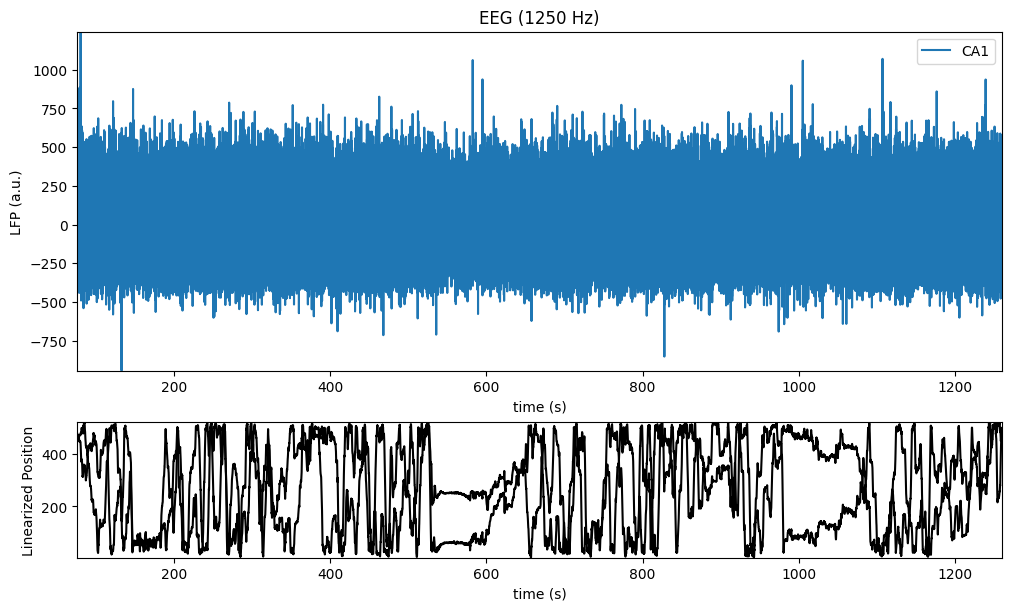

In [9]:
fig = plt.figure(constrained_layout=True, figsize=(10, 6))
axd = fig.subplot_mosaic(
    [["ephys"], ["pos"]],
    height_ratios=[1, 0.4],
)
axd["ephys"].plot(eeg_example, label="CA1")
axd["ephys"].set_title("EEG (1250 Hz)")
axd["ephys"].set_ylabel("LFP (a.u.)")
axd["ephys"].set_xlabel("time (s)")
axd["ephys"].margins(0)
axd["ephys"].legend()
axd["pos"].plot(pos_example, color="black")
axd["pos"].margins(0)
axd["pos"].set_xlabel("time (s)")
axd["pos"].set_ylabel("Linearized Position")
axd["pos"].set_xlim(RUN_interval[0, 0], RUN_interval[0, 1])

In [10]:
power = nap.compute_power_spectral_density(eeg_example, fs=1000, ep=wake_ep)

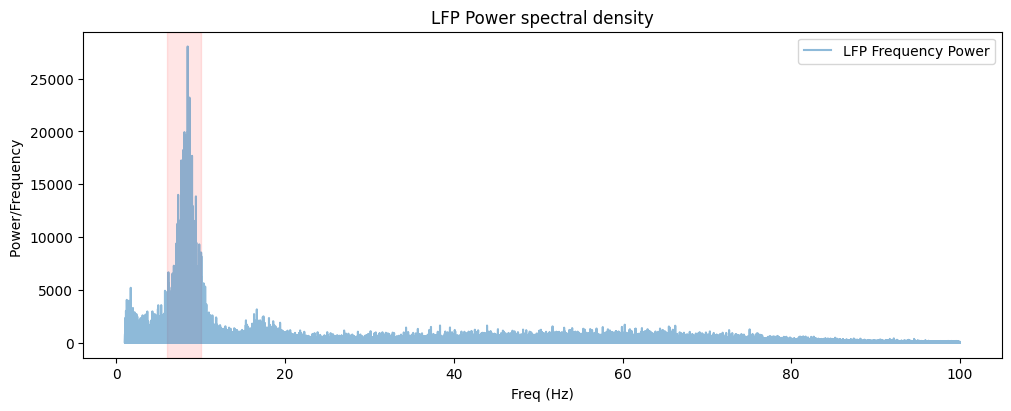

In [11]:
fig, ax = plt.subplots(1, constrained_layout=True, figsize=(10, 4))
ax.plot(
    power[(power.index >= 1.0) & (power.index <= 100)],
    alpha=0.5,
    label="LFP Frequency Power",
)
ax.axvspan(6, 10, color="red", alpha=0.1)
ax.set_xlabel("Freq (Hz)")
ax.set_ylabel("Power/Frequency ")
ax.set_title("LFP Power spectral density")
ax.legend()

In [19]:
raw_pos,combined_array, mask,speeds,smoothed_speed,filtered_speed = pos2speed(pos_cord[:,0], # times
                            pos_cord[:,1], # x
                            pos_cord[:,2], # y
                            filter_speed=True, 
                            min_speed = 0.05)


starts,stops = find_run_indices(smoothed_speed, threshold=0.05)
print("Starts:", time_stemp[starts])  # Output: Starts: [1, 6]
print("Stops:", time_stemp[stops])   # Output: Stops: [3, 7]

Starts: [  76.46530151   76.54530334   76.70529938   77.00530243   77.24526977
   77.30526733   77.34526825   77.42527008   77.46526337   77.56526947
   77.62526703   77.68526459   77.74526977   77.88523102   78.12523651
   78.20523071   78.28523254   78.40523529   78.52523041   78.56523132
   78.64520264   78.78520203   78.84519959   78.90519714   78.96520233
   79.00520325   79.06520081   79.12519836   79.2052002    79.56517029
   79.76516724   79.88516998   80.04516602   80.16513061   80.26513672
   80.6251297    80.66513061   81.36509705   81.52510071   81.70506287
   81.76506805   81.80506897   82.00506592   82.24506378   82.2850647
   82.465065     82.64503479   82.74503326   82.86503601   83.24500275
   83.34500122   83.4449997    83.54499817   83.60500336   83.68499756
   83.78500366   83.88500214   83.9449997    84.02496338   84.32496643
   84.4249649    84.70496368   84.9649353    85.02493286   85.12493133
   85.42493439   85.48493195   85.5848999    85.62490082   85.72489929

In [ ]:
raw_pos,combined_array, mask,speeds,smoothed_speed,filtered_speed = pos2speed(pos_cord[:,0], # times
                            pos_cord[:,1], # x
                            pos_cord[:,2], # y
                            filter_speed=True, 
                            min_speed = 0.05)
starts,stops = find_run_indices(smoothed_speed, threshold=0.05)
run_ep = nap.IntervalSet(start=time_stemp[starts], end=time_stemp[stops], time_units='s')

# The rest epoch is the data at all points where we do not have position data
rest_ep = wake_ep.set_diff(run_ep)

C:\Users\sachur\AppData\Local\Temp\ipykernel_20908\3235198138.py:1: UserWarning: Some epochs have no duration
  run_ep = nap.IntervalSet(start=time_stemp[starts], end=time_stemp[stops], time_units='s')


In [21]:
run_ep

index    start           end
0        76.465301514    76.505302429
1        76.545303345    76.585296631
2        77.005302429    77.145263672
3        77.34526825     77.365264893
4        77.56526947     77.585266113
5        77.625267029    77.645263672
6        78.125236511    78.145233154
...      ...             ...
3632     1256.674438477  1256.694458008
3633     1256.814453125  1256.834350586
3634     1256.914428711  1256.954345703
3635     1257.014404297  1257.374389648
3636     1257.494384766  1259.034301758
3637     1259.094360352  1259.194335938
3638     1259.23425293   1259.274291992
shape: (3639, 2), time unit: sec.

In [22]:
power_run = nap.compute_mean_power_spectral_density(
    eeg_example, 1.5, fs=FS, ep=run_ep
)
power_rest = nap.compute_mean_power_spectral_density(
    eeg_example, 1.5, fs=FS, ep=rest_ep
)

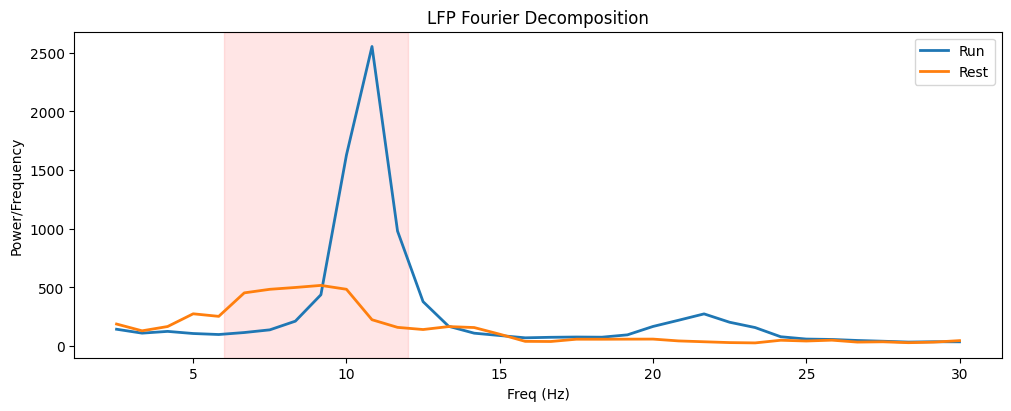

In [29]:
fig, ax = plt.subplots(1, constrained_layout=True, figsize=(10, 4))
ax.plot(
    power_run[(power_run.index >= 2.0) & (power_run.index <= 30)],
    alpha=1,
    label="Run",
    linewidth=2,
)
ax.plot(
    power_rest[(power_rest.index >= 2.0) & (power_rest.index <= 30)],
    alpha=1,
    label="Rest",
    linewidth=2,
)
ax.axvspan(6, 12, color="red", alpha=0.1)
ax.set_xlabel("Freq (Hz)")
ax.set_ylabel("Power/Frequency")
ax.set_title("LFP Fourier Decomposition")
ax.legend()

In [30]:
# We must define the frequency set that we'd like to use for our decomposition
freqs = np.geomspace(3, 250, 100)
mwt_RUN = nap.compute_wavelet_transform(eeg_example, fs=FS, freqs=freqs)
print(mwt_RUN)


Time (s)        3.0                    3.1370646170253313    3.280391470464097     3.4302666706615383    3.5869893998311992    ...
--------------  ---------------------  --------------------  --------------------  --------------------  --------------------  -----
76.445633333    (-4.29314-4.27633j)    (-5.09567-4.03667j)   (-5.74852-3.64443j)   (-6.1693-3.29315j)    (-6.39693-3.2293j)    ...
76.446633333    (-4.2303-4.34995j)     (-5.03615-4.12392j)   (-5.69384-3.74472j)   (-6.1175-3.40237j)    (-6.34068-3.34494j)   ...
76.447633333    (-4.1665-4.42198j)     (-4.97466-4.21099j)   (-5.6373-3.84464j)    (-6.06381-3.51059j)   (-6.28258-3.45985j)   ...
76.448633333    (-4.10152-4.49304j)    (-4.91165-4.29714j)   (-5.5789-3.94309j)    (-6.00835-3.6179j)    (-6.223-3.5736j)      ...
76.449633333    (-4.03505-4.56423j)    (-4.84726-4.38175j)   (-5.51889-4.04011j)   (-5.95127-3.72416j)   (-6.16106-3.68587j)   ...
76.450633333    (-3.96792-4.6338j)     (-4.78135-4.46598j)   (-5.45713-4.1366j)  

Text(0, 0.5, 'Pos.')

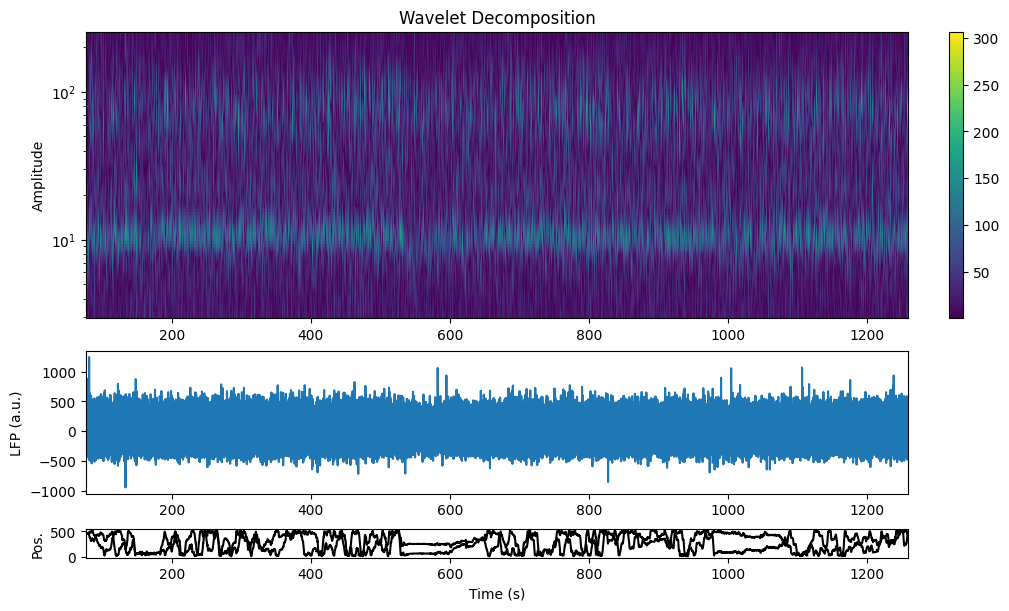

In [31]:
fig = plt.figure(constrained_layout=True, figsize=(10, 6))
gs = plt.GridSpec(3, 1, figure=fig, height_ratios=[1.0, 0.5, 0.1])

ax0 = plt.subplot(gs[0, 0])
pcmesh = ax0.pcolormesh(mwt_RUN.t, freqs, np.transpose(np.abs(mwt_RUN)))
ax0.grid(False)
ax0.set_yscale("log")
ax0.set_title("Wavelet Decomposition")
ax0.set_ylabel("Frequency (Hz)")
cbar = plt.colorbar(pcmesh, ax=ax0, orientation="vertical")
ax0.set_ylabel("Amplitude")

ax1 = plt.subplot(gs[1, 0], sharex=ax0)
ax1.plot(eeg_example)
ax1.set_ylabel("LFP (a.u.)")

ax1 = plt.subplot(gs[2, 0], sharex=ax0)
ax1.plot(pos_example, color="black")
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Pos.")

In [43]:
ep_ex_rem = nap.IntervalSet(
    npdata["XY_mid_brain"].time_support['start'] + 97.0,
    npdata["XY_mid_brain"].time_support['start'] + 100.0,
)

raw_pos,combined_array, mask,speeds,smoothed_speed,filtered_speed = pos2speed(pos_cord[:,0], # times
                            pos_cord[:,1], # x
                            pos_cord[:,2], # y
                            filter_speed=True, 
                            min_speed = 0.05)
starts,stops = find_run_indices(smoothed_speed, threshold=0.05)
run_ep = nap.IntervalSet(start=time_stemp[starts], end=time_stemp[stops], time_units='s')

wake_ep = npdata["XY_mid_brain"].time_support


C:\Users\sachur\AppData\Local\Temp\ipykernel_20908\3509318086.py:12: UserWarning: Some epochs have no duration
  run_ep = nap.IntervalSet(start=time_stemp[starts], end=time_stemp[stops], time_units='s')


In [39]:
forward_ep = npdata["XY_mid_brain"]
RUN_interval = nap.IntervalSet(forward_ep.start, forward_ep.end)
eeg = npdata['lfp_raw']
FS = 1250
wake_ep = npdata["XY_mid_brain"].time_support

eeg_example = eeg.restrict(RUN_interval)[:, ch_num[0]]

In [40]:
spikes = npdata["units"].restrict(run_ep)

c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:145: UserWarning: Metadata name 'num_negative_peaks.1' contains a special character, and cannot be accessed as an attribute. Use 'get_info()' or key indexing to access metadata.
  warnings.warn(
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:145: UserWarning: Metadata name 'recovery_slope.1' contains a special character, and cannot be accessed as an attribute. Use 'get_info()' or key indexing to access metadata.
  warnings.warn(
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:145: UserWarning: Metadata name 'cluster_id.21' contains a special character, and cannot be accessed as an attribute. Use 'get_info()' or key indexing to access metadata.
  warnings.warn(
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:145: UserWarning: Meta

array([76.44529724])

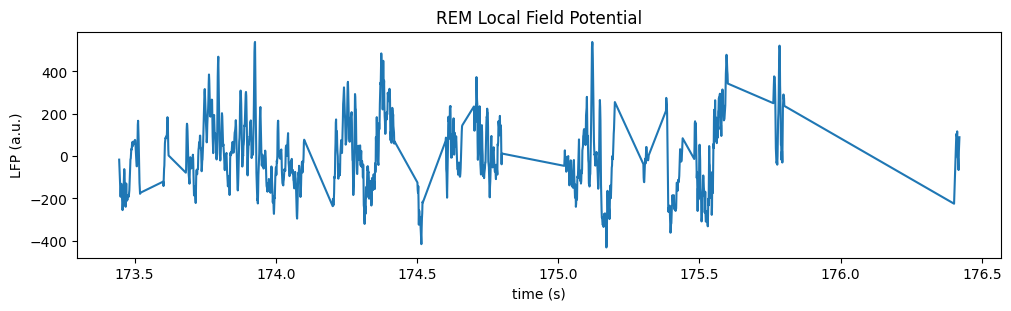

In [ ]:
fig, ax = plt.subplots(1, constrained_layout=True, figsize=(10, 3))
ax.plot(eeg_example.restrict(ep_ex_rem))
ax.set_title("REM Local Field Potential")
ax.set_ylabel("LFP (a.u.)")
ax.set_xlabel("time (s)")
wake_ep['start']

In [46]:
freqs = np.geomspace(5, 200, 25)

In [47]:
cwt_rem = nap.compute_wavelet_transform(eeg_example.restrict(ep_ex_rem), fs=FS, freqs=freqs)

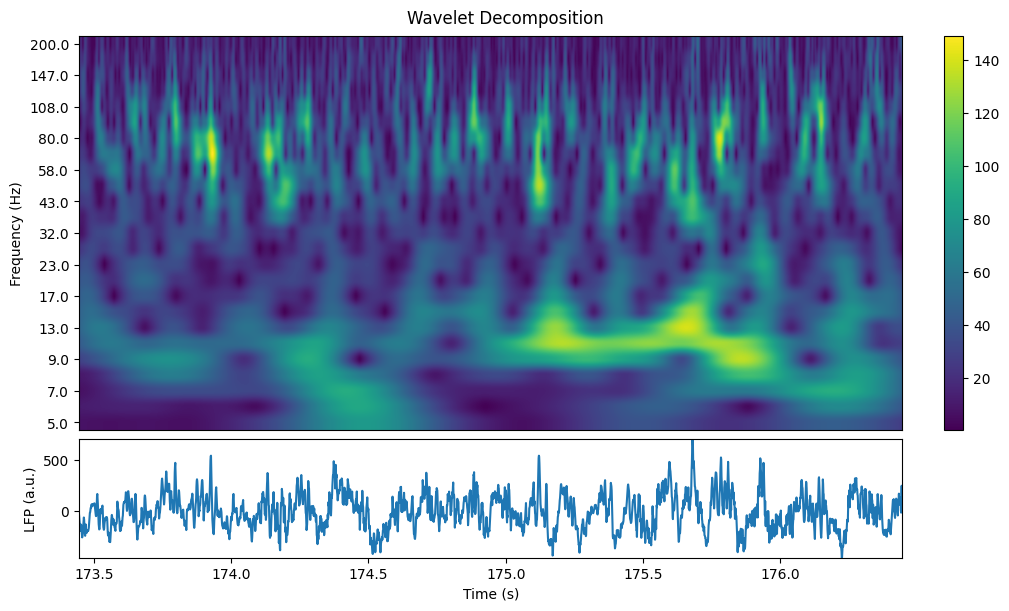

In [48]:
# Define wavelet decomposition plotting function
def plot_timefrequency(freqs, powers, ax=None):
    im = ax.imshow(np.abs(powers), aspect="auto")
    ax.invert_yaxis()
    ax.set_xlabel("Time (s)")
    ax.set_ylabel("Frequency (Hz)")
    ax.get_xaxis().set_visible(False)
    ax.set(yticks=np.arange(len(freqs))[::2], yticklabels=np.rint(freqs[::2]))
    ax.grid(False)
    return im

fig = plt.figure(constrained_layout=True, figsize=(10, 6))
fig.suptitle("Wavelet Decomposition")
gs = plt.GridSpec(2, 1, figure=fig, height_ratios=[1.0, 0.3])

ax0 = plt.subplot(gs[0, 0])
im = plot_timefrequency(freqs, np.transpose(cwt_rem[:, :].values), ax=ax0)
cbar = fig.colorbar(im, ax=ax0, orientation="vertical")

ax1 = plt.subplot(gs[1, 0])
ax1.plot(eeg_example.restrict(ep_ex_rem))
ax1.set_ylabel("LFP (a.u.)")
ax1.set_xlabel("Time (s)")
ax1.margins(0)

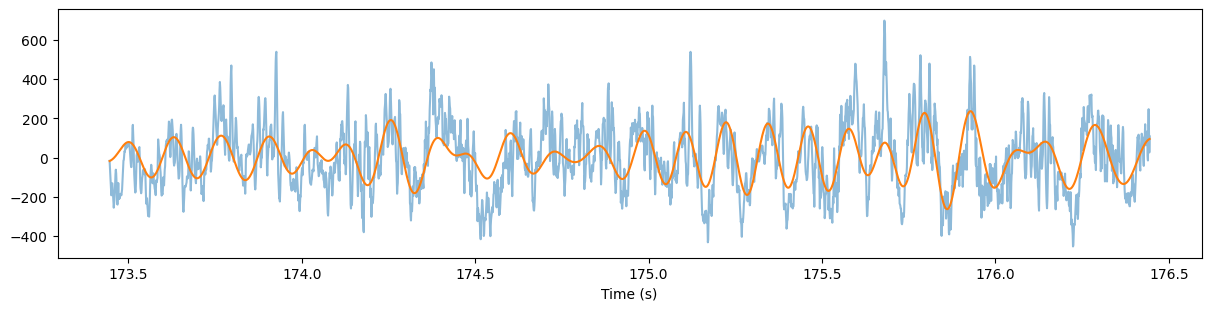

In [49]:
theta_band = nap.apply_bandpass_filter(eeg_example, cutoff=(6.0, 12.0), fs=FS)
plt.figure(constrained_layout=True, figsize=(12, 3))
plt.plot(eeg_example.restrict(ep_ex_rem), alpha=0.5)
plt.plot(theta_band.restrict(ep_ex_rem))
plt.xlabel("Time (s)")
plt.show()

In [50]:
from scipy import signal

theta_phase = nap.Tsd(t=theta_band.t, d=np.angle(signal.hilbert(theta_band)))

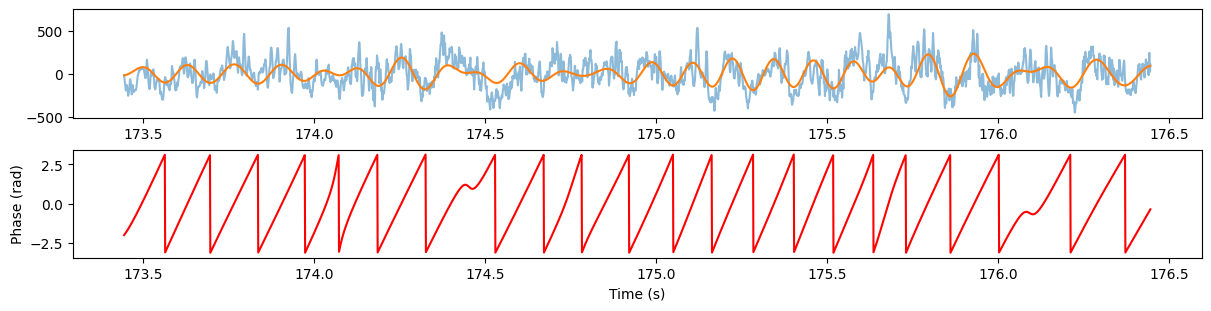

In [52]:
plt.figure(constrained_layout=True, figsize=(12, 3))
plt.subplot(211)
plt.plot(eeg_example.restrict(ep_ex_rem), alpha=0.5)
plt.plot(theta_band.restrict(ep_ex_rem))
plt.subplot(212)
plt.plot(theta_phase.restrict(ep_ex_rem), color='r')
plt.ylabel("Phase (rad)")
plt.xlabel("Time (s)")
plt.show()

In [53]:
spikes = spikes[spikes.rate > 5.0]

c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:145: UserWarning: Metadata name 'num_negative_peaks.1' contains a special character, and cannot be accessed as an attribute. Use 'get_info()' or key indexing to access metadata.
  warnings.warn(
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:145: UserWarning: Metadata name 'recovery_slope.1' contains a special character, and cannot be accessed as an attribute. Use 'get_info()' or key indexing to access metadata.
  warnings.warn(
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:145: UserWarning: Metadata name 'cluster_id.21' contains a special character, and cannot be accessed as an attribute. Use 'get_info()' or key indexing to access metadata.
  warnings.warn(
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:145: UserWarning: Meta

In [54]:
phase_modulation = nap.compute_1d_tuning_curves(
    group=spikes, feature=theta_phase, nb_bins=61, minmax=(-np.pi, np.pi)
)

c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:145: UserWarning: Metadata name 'num_negative_peaks.1' contains a special character, and cannot be accessed as an attribute. Use 'get_info()' or key indexing to access metadata.
  warnings.warn(
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:145: UserWarning: Metadata name 'recovery_slope.1' contains a special character, and cannot be accessed as an attribute. Use 'get_info()' or key indexing to access metadata.
  warnings.warn(
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:145: UserWarning: Metadata name 'cluster_id.21' contains a special character, and cannot be accessed as an attribute. Use 'get_info()' or key indexing to access metadata.
  warnings.warn(
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\metadata_class.py:145: UserWarning: Meta

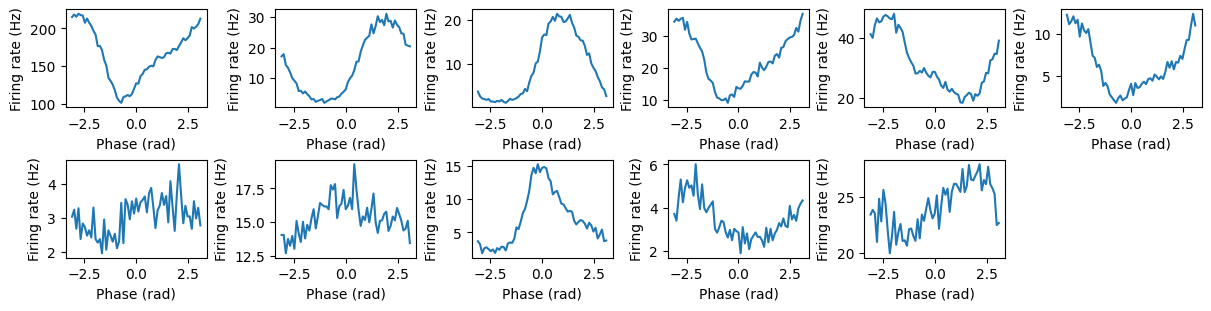

In [59]:
plt.figure(constrained_layout=True, figsize = (12, 3))
for i in range(11):
    plt.subplot(2,6,i+1)
    plt.plot(phase_modulation.iloc[:,i])
    plt.xlabel("Phase (rad)")
    plt.ylabel("Firing rate (Hz)")
plt.show()

In [57]:
phase_modulation

,15,17,19,22,24,26,29,31,32,33,35
-3.090091e+00,215.189402,17.140806,3.614025,34.591387,41.148261,12.339316,3.046107,14.043070,3.665654,3.717283,23.439537
-2.987088e+00,218.480635,17.819343,2.530863,35.535385,39.925657,11.208108,3.253967,14.048873,3.202317,3.408918,23.862424
-2.884085e+00,215.572765,14.288685,2.019053,34.841612,44.212090,11.544843,2.692071,12.683796,1.863741,4.452271,23.555621
-2.781082e+00,219.469668,13.340212,1.905745,35.488055,46.355950,12.155560,3.296423,13.752265,2.626837,5.305181,20.963191
-2.678079e+00,217.775193,11.836173,1.713130,35.768083,45.060517,11.317042,2.388000,13.237825,2.751391,4.256869,24.866345
-2.575076e+00,217.139492,9.987589,1.914719,32.032733,45.384017,11.747060,2.846204,13.972274,2.483960,4.916171,22.821381
-2.472073e+00,207.593151,9.090917,1.342976,34.504161,46.952519,9.710752,2.737606,13.016540,2.169423,5.268599,25.671509
-2.369070e+00,213.189728,8.243474,1.347990,30.848222,47.490708,11.302374,2.488596,15.087114,2.436750,4.925346,24.419349
-2.266067e+00,207.658955,5.707767,1.193442,29.005836,47.063137,10.481536,2.646329,14.165641,1.919885,5.033213,22.052738
-2.163064e+00,203.512034,5.801310,1.502125,29.110146,46.306887,10.152293,2.434478,13.519125,2.641668,4.558172,19.942004
